In [69]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer, FunctionTransformer, LabelEncoder
import math

# Download latest version
path = kagglehub.dataset_download("siddharthss/crop-recommendation-dataset")
print("Path to dataset files:", path)

# Load the dataset
file_path = path + "/Crop_recommendation.csv"
data = pd.read_csv(file_path)



Path to dataset files: C:\Users\usama\.cache\kagglehub\datasets\siddharthss\crop-recommendation-dataset\versions\1



--- Dataset Preview ---
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), o

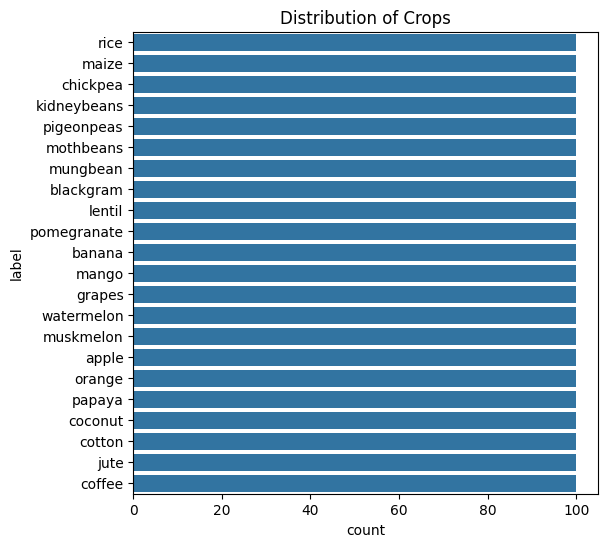

In [70]:
# General Information
print("\n--- Dataset Preview ---")
print(data.head())

print("\n--- Dataset Info ---")
data.info()

print("\n--- Data Types ---")
print(data.dtypes)

print("\n--- Descriptive Statistics ---")
print(data.describe())

print("\n--- Unique Values in Each Column ---")
for column in data.columns:
    print(f"{column}: {data[column].nunique()} unique values")
print("\n")

# Visualize label distribution
plt.figure(figsize=(6, 6))
sns.countplot(y='label', data=data)
plt.title('Distribution of Crops')
plt.show()


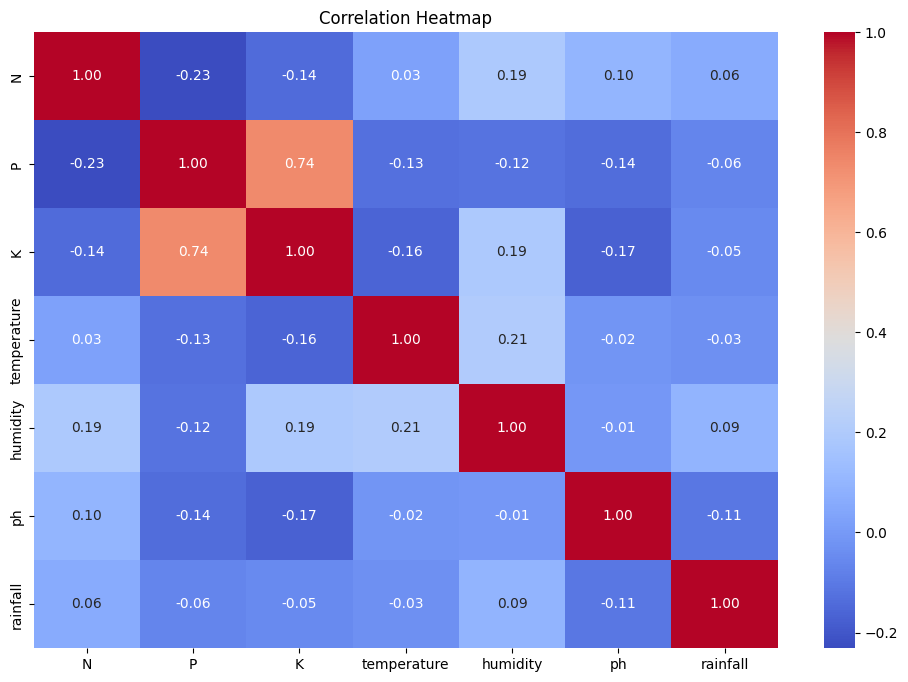

In [71]:
# Visualizations
# Correlation Heatmap (only for numeric data)
numeric_data = data.select_dtypes(include=["float64", "int64"])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

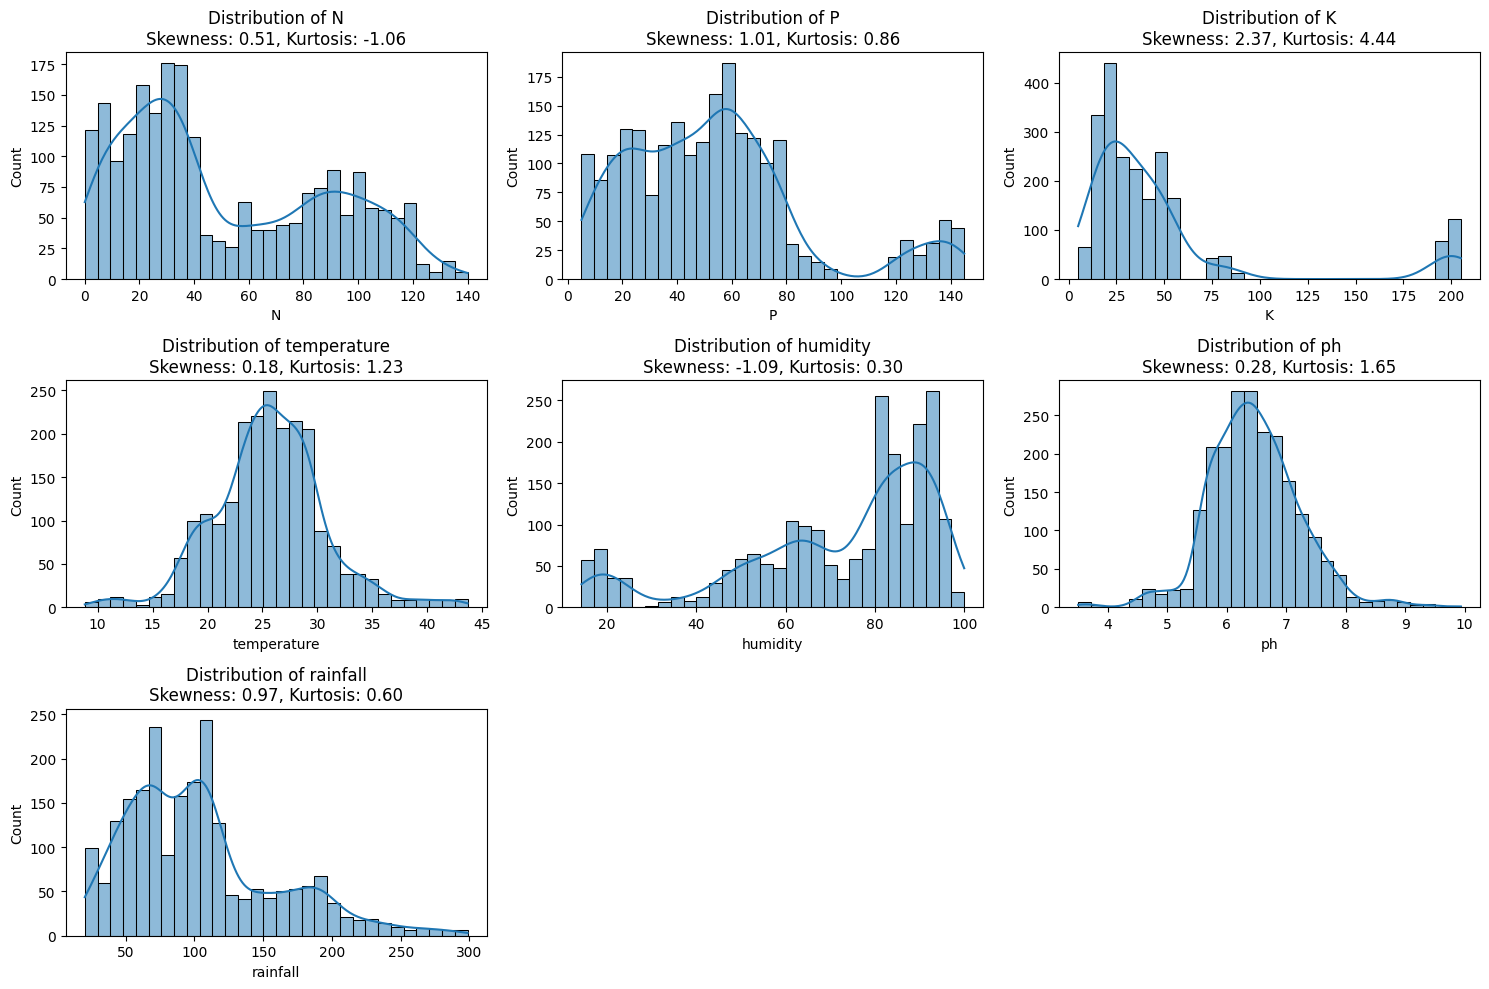

(N              0.509374
 P              1.010083
 K              2.373547
 temperature    0.184807
 humidity      -1.090963
 ph             0.283736
 rainfall       0.965098
 dtype: float64,
 N             -1.058562
 P              0.855599
 K              4.436523
 temperature    1.227029
 humidity       0.298722
 ph             1.649095
 rainfall       0.602974
 dtype: float64)

In [72]:
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Compute skewness and kurtosis for each numerical column
skewness = data[numeric_columns].apply(stats.skew)
kurtosis = data[numeric_columns].apply(stats.kurtosis)


# Recalculate the number of subplots dynamically based on the number of numeric columns
num_cols = len(numeric_columns)
fig, axes = plt.subplots(nrows=(num_cols // 3) + 1, ncols=3, figsize=(15, 10))

# Flatten axes and remove unused subplots
axes = axes.flatten()
for i in range(len(axes)):
    if i >= num_cols:
        fig.delaxes(axes[i])  # Remove extra subplot

# Plot histograms to visualize distributions
for i, col in enumerate(numeric_columns):
    sns.histplot(data[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}\nSkewness: {skewness[col]:.2f}, Kurtosis: {kurtosis[col]:.2f}")

plt.tight_layout()
plt.show()

# Display skewness and kurtosis values
skewness, kurtosis

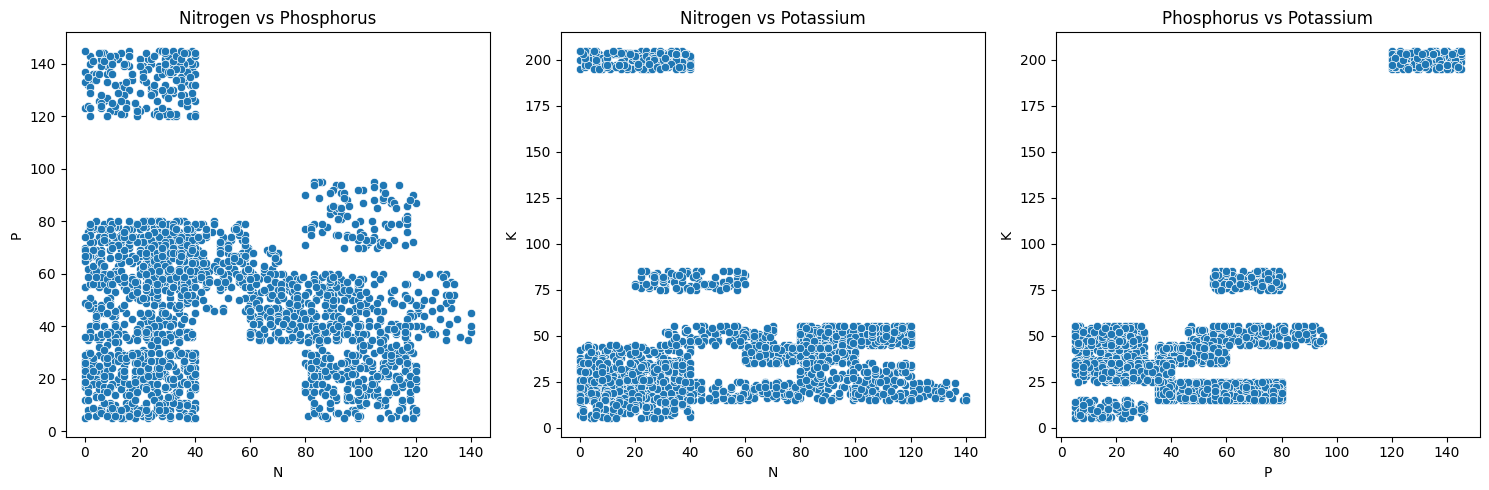

In [73]:
# Create scatter plots for nutrient relationships
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# N vs P
sns.scatterplot(data=data, x='N', y='P', ax=axes[0])
axes[0].set_title('Nitrogen vs Phosphorus')

# N vs K
sns.scatterplot(data=data, x='N', y='K', ax=axes[1])
axes[1].set_title('Nitrogen vs Potassium')

# P vs K
sns.scatterplot(data=data, x='P', y='K', ax=axes[2])
axes[2].set_title('Phosphorus vs Potassium')

plt.tight_layout()
plt.show()

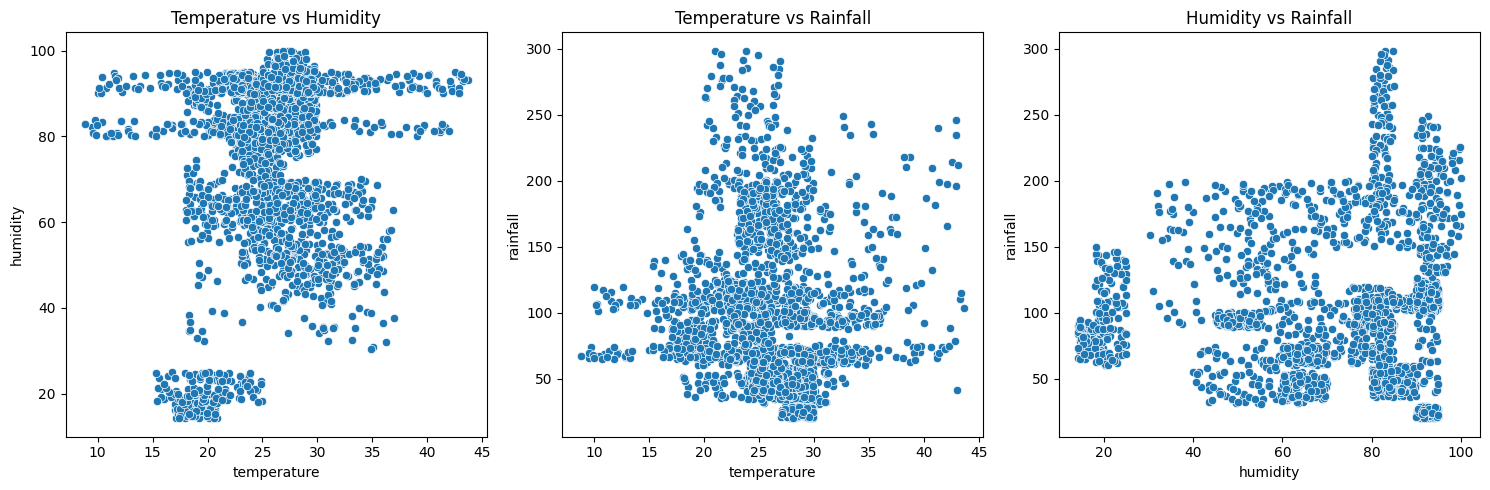

In [74]:
# Create scatter plots for environmental factors
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Temperature vs Humidity
sns.scatterplot(data=data, x='temperature', y='humidity', ax=axes[0])
axes[0].set_title('Temperature vs Humidity')

# Temperature vs Rainfall
sns.scatterplot(data=data, x='temperature', y='rainfall', ax=axes[1])
axes[1].set_title('Temperature vs Rainfall')

# Humidity vs Rainfall
sns.scatterplot(data=data, x='humidity', y='rainfall', ax=axes[2])
axes[2].set_title('Humidity vs Rainfall')

plt.tight_layout()
plt.show()

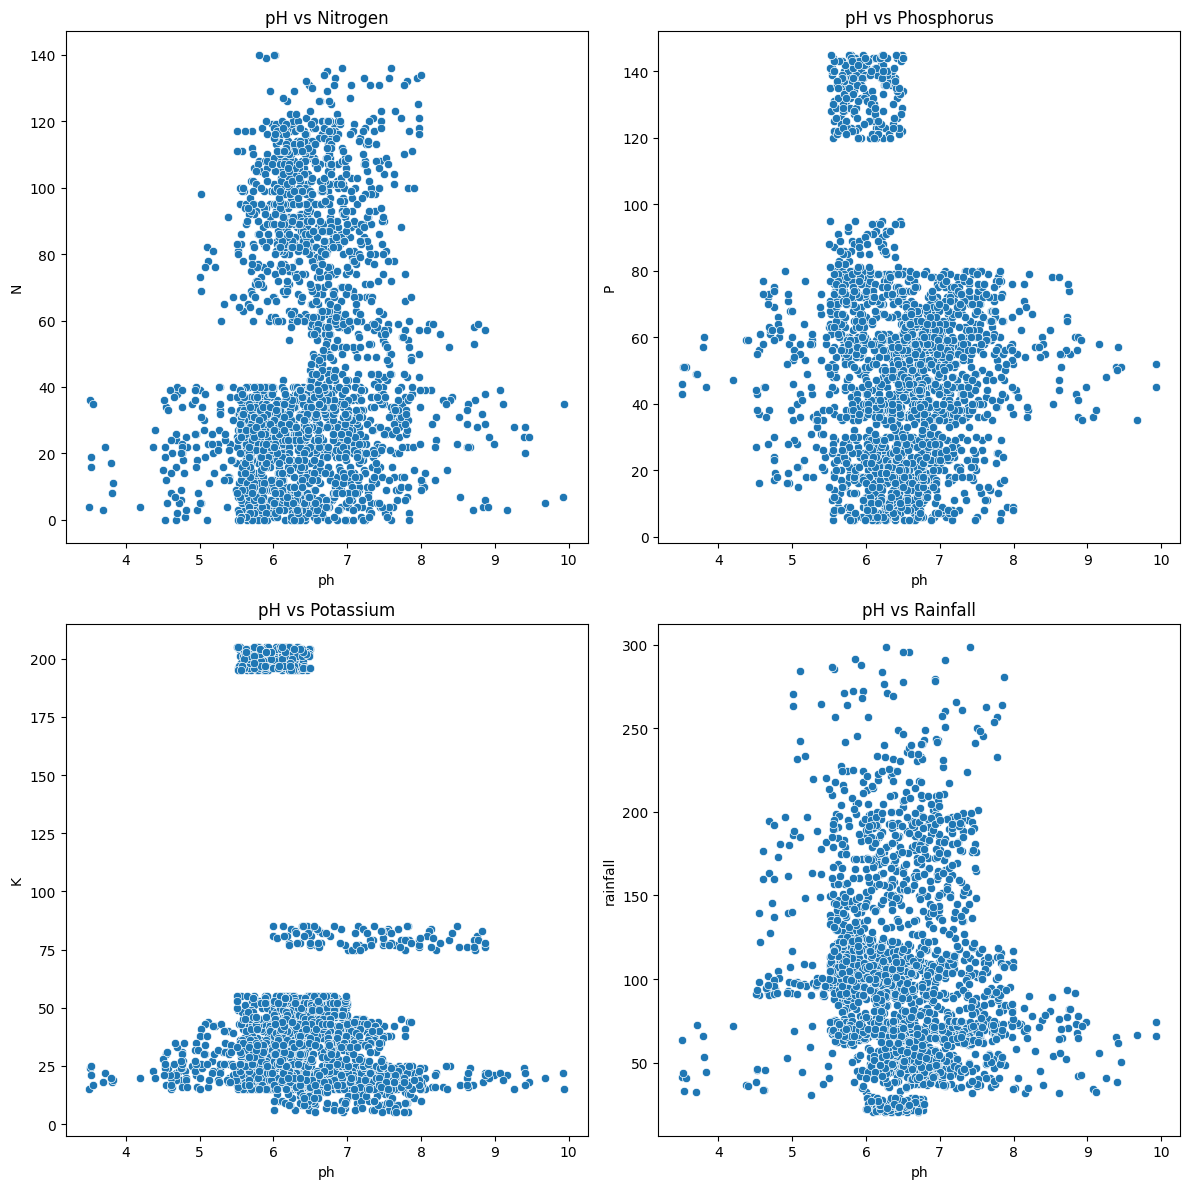

In [75]:
# Create scatter plots for pH relationships
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# pH vs N
sns.scatterplot(data=data, x='ph', y='N', ax=axes[0,0])
axes[0,0].set_title('pH vs Nitrogen')

# pH vs P
sns.scatterplot(data=data, x='ph', y='P', ax=axes[0,1])
axes[0,1].set_title('pH vs Phosphorus')

# pH vs K
sns.scatterplot(data=data, x='ph', y='K', ax=axes[1,0])
axes[1,0].set_title('pH vs Potassium')

# pH vs Rainfall
sns.scatterplot(data=data, x='ph', y='rainfall', ax=axes[1,1])
axes[1,1].set_title('pH vs Rainfall')

plt.tight_layout()
plt.show()

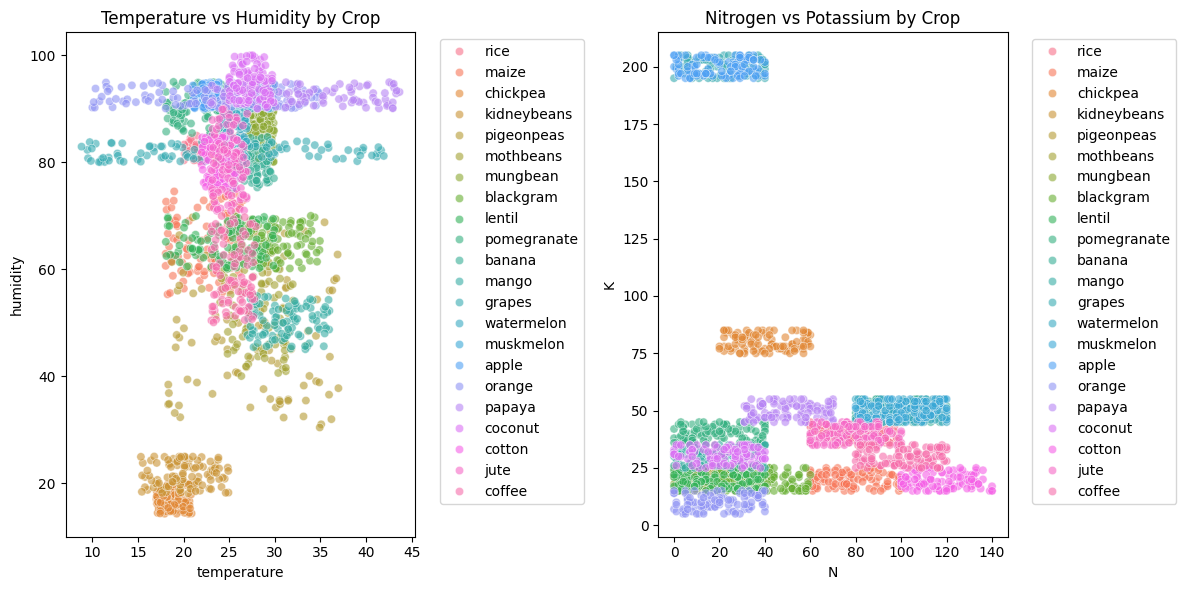

In [76]:
# Create scatter plots with crop type coloring
plt.figure(figsize=(12, 6))

# Temperature vs Humidity colored by crop
plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x='temperature', y='humidity', hue='label', alpha=0.6)
plt.title('Temperature vs Humidity by Crop')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# N vs K colored by crop
plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x='N', y='K', hue='label', alpha=0.6)
plt.title('Nitrogen vs Potassium by Crop')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

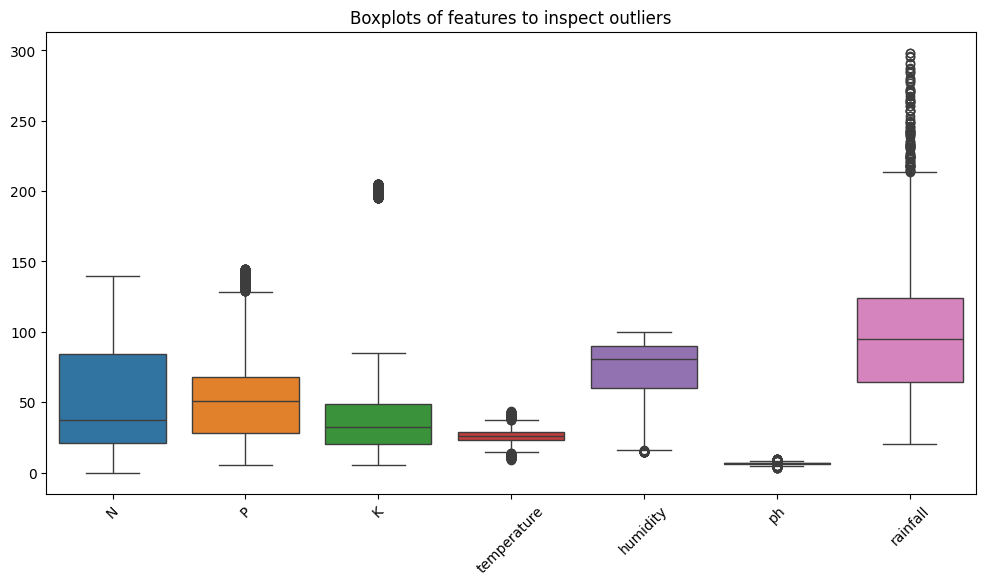

In [77]:
# Define numerical features to plot (excluding categorical column 'label' if present)
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Set figure size
plt.figure(figsize=(12, 6))

# Create box plots
sns.boxplot(data=data[features])

# Set labels
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.title("Boxplots of features to inspect outliers")
plt.show()

In [78]:
def split_dataset(data, train_size=0.75, random_state=42):
    """
    Split the dataset into training and test sets while maintaining class proportions.
    Returns:
    X_train, X_test, y_train, y_test
    """
    from sklearn.model_selection import train_test_split


    X = data.drop('label', axis=1)
    y = data['label']


    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        train_size=train_size,
        stratify=y,
        random_state=random_state
    )

    print(f"Training set shape: {X_train.shape}")
    print(f"Test set shape: {X_test.shape}")

    print("\nCrop distribution in training set:")
    print(y_train.value_counts())
    print("\nCrop distribution in test set:")
    print(y_test.value_counts())

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_dataset(data, train_size=0.75)

Training set shape: (1650, 7)
Test set shape: (550, 7)

Crop distribution in training set:
label
watermelon     75
pigeonpeas     75
coffee         75
grapes         75
orange         75
apple          75
mango          75
kidneybeans    75
jute           75
mungbean       75
banana         75
cotton         75
rice           75
lentil         75
papaya         75
maize          75
muskmelon      75
chickpea       75
pomegranate    75
blackgram      75
coconut        75
mothbeans      75
Name: count, dtype: int64

Crop distribution in test set:
label
pigeonpeas     25
blackgram      25
chickpea       25
orange         25
muskmelon      25
kidneybeans    25
mungbean       25
cotton         25
mango          25
apple          25
lentil         25
maize          25
coffee         25
rice           25
mothbeans      25
coconut        25
watermelon     25
banana         25
pomegranate    25
papaya         25
jute           25
grapes         25
Name: count, dtype: int64


In [79]:
def augment_data(df, y, n_copies=2, 
                # Gaussian noise parameters
                nutrient_cols=['N', 'P', 'K'],
                noise_mean=0, noise_std=0.05, noise_factor=0.05,
                # Weather & soil parameters
                temp_var=3.0, humidity_var=7.0, soil_ph_var=0.3):

    augmented_dfs = [df.copy()]  # Start with original data
    augmented_ys = [y.copy()]    # Start with original labels
    
    for _ in range(n_copies - 1):
        df_aug = df.copy()
        
        # Add Gaussian noise to nutrient columns
        for col in nutrient_cols:
            noise = np.random.normal(noise_mean, noise_std * df[col].std(), df.shape[0])
            df_aug[col] += noise * noise_factor
            
        # Add weather & soil variability
        if 'temperature' in df.columns:
            df_aug['temperature'] += np.random.uniform(-temp_var, temp_var, df.shape[0])
        if 'humidity' in df.columns:
            df_aug['humidity'] += np.random.uniform(-humidity_var, humidity_var, df.shape[0])
        if 'ph' in df.columns:
            df_aug['ph'] += np.random.uniform(-soil_ph_var, soil_ph_var, df.shape[0])
            
        augmented_dfs.append(df_aug)
        augmented_ys.append(y.copy())
    
    # Concatenate all versions
    X_augmented = pd.concat(augmented_dfs, axis=0, ignore_index=True)
    y_augmented = pd.concat(augmented_ys, ignore_index=True)
    
    return X_augmented, y_augmented

# Apply the combined augmentation to training data
X_augmented, y_augmented = augment_data(X_train, y_train, n_copies=2)

# Print shapes to see the augmentation effect
print("Original X_train shape:", X_train.shape)
print("Original y_train shape:", y_train.shape)
print("Augmented X_train shape:", X_augmented.shape)
print("Augmented y_train shape:", y_augmented.shape)
print("X_test shape (unchanged):", X_test.shape)
print("y_test shape (unchanged):", y_test.shape)

Original X_train shape: (1650, 7)
Original y_train shape: (1650,)
Augmented X_train shape: (3300, 7)
Augmented y_train shape: (3300,)
X_test shape (unchanged): (550, 7)
y_test shape (unchanged): (550,)


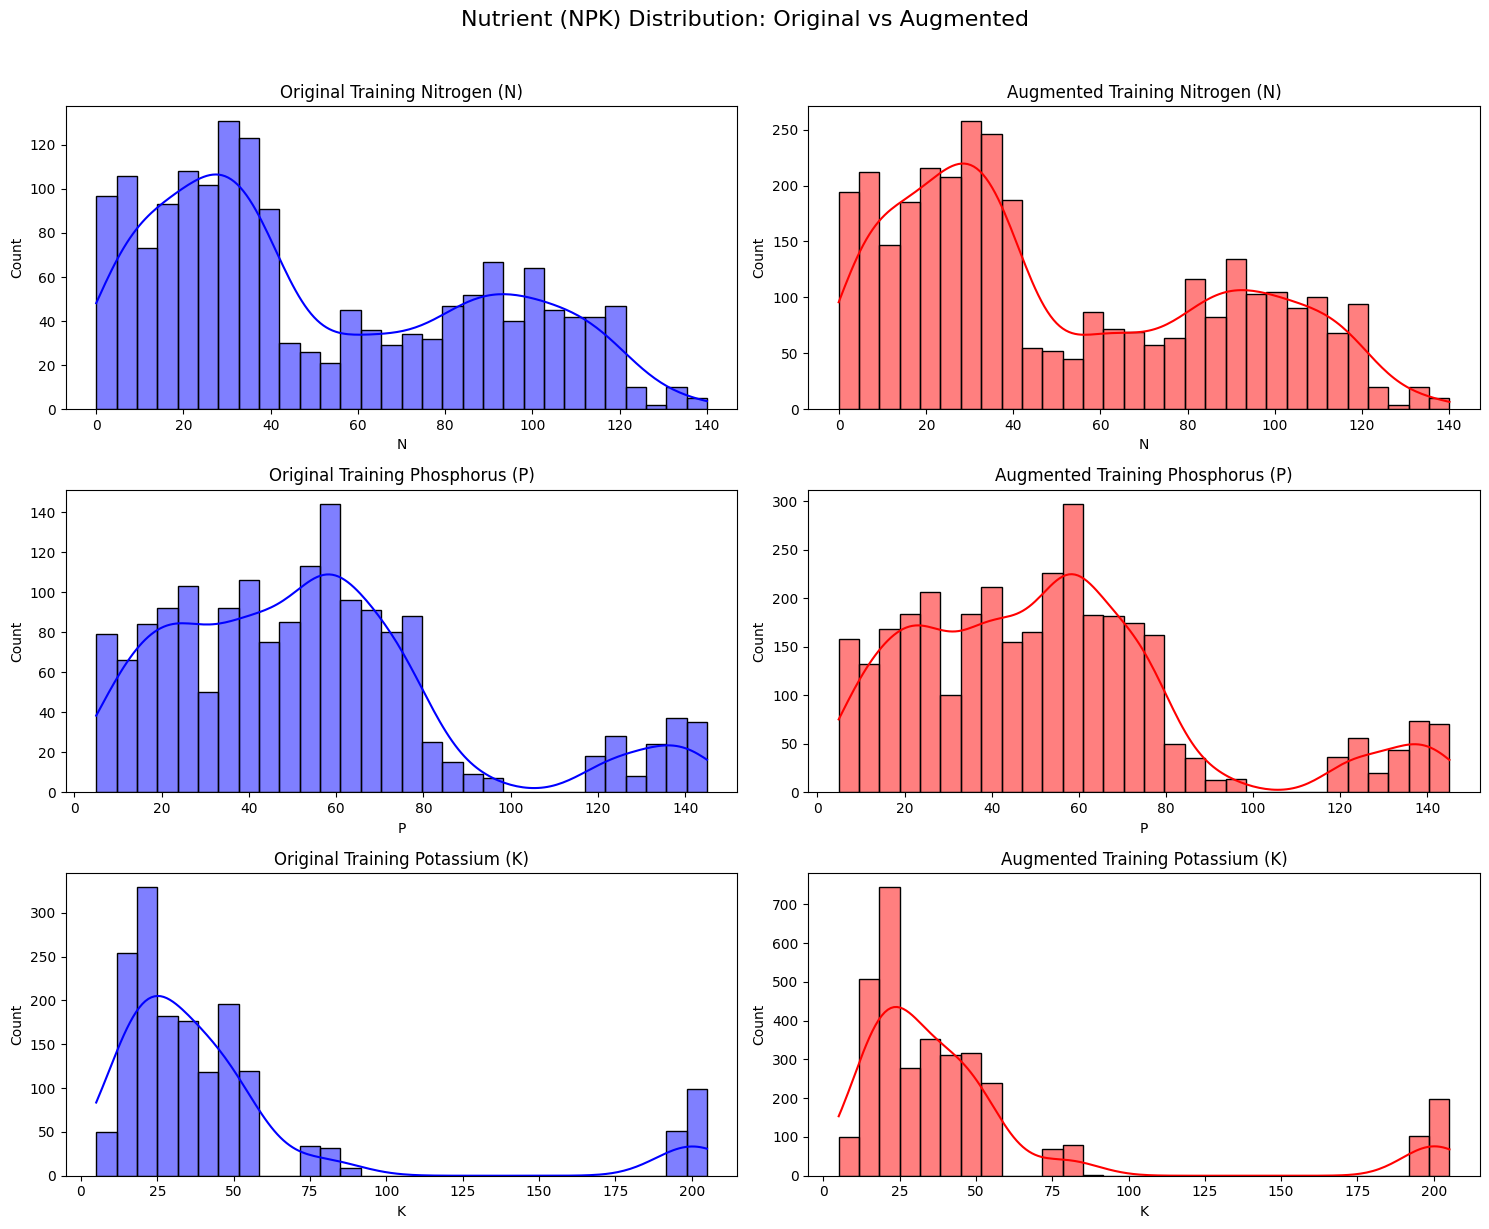

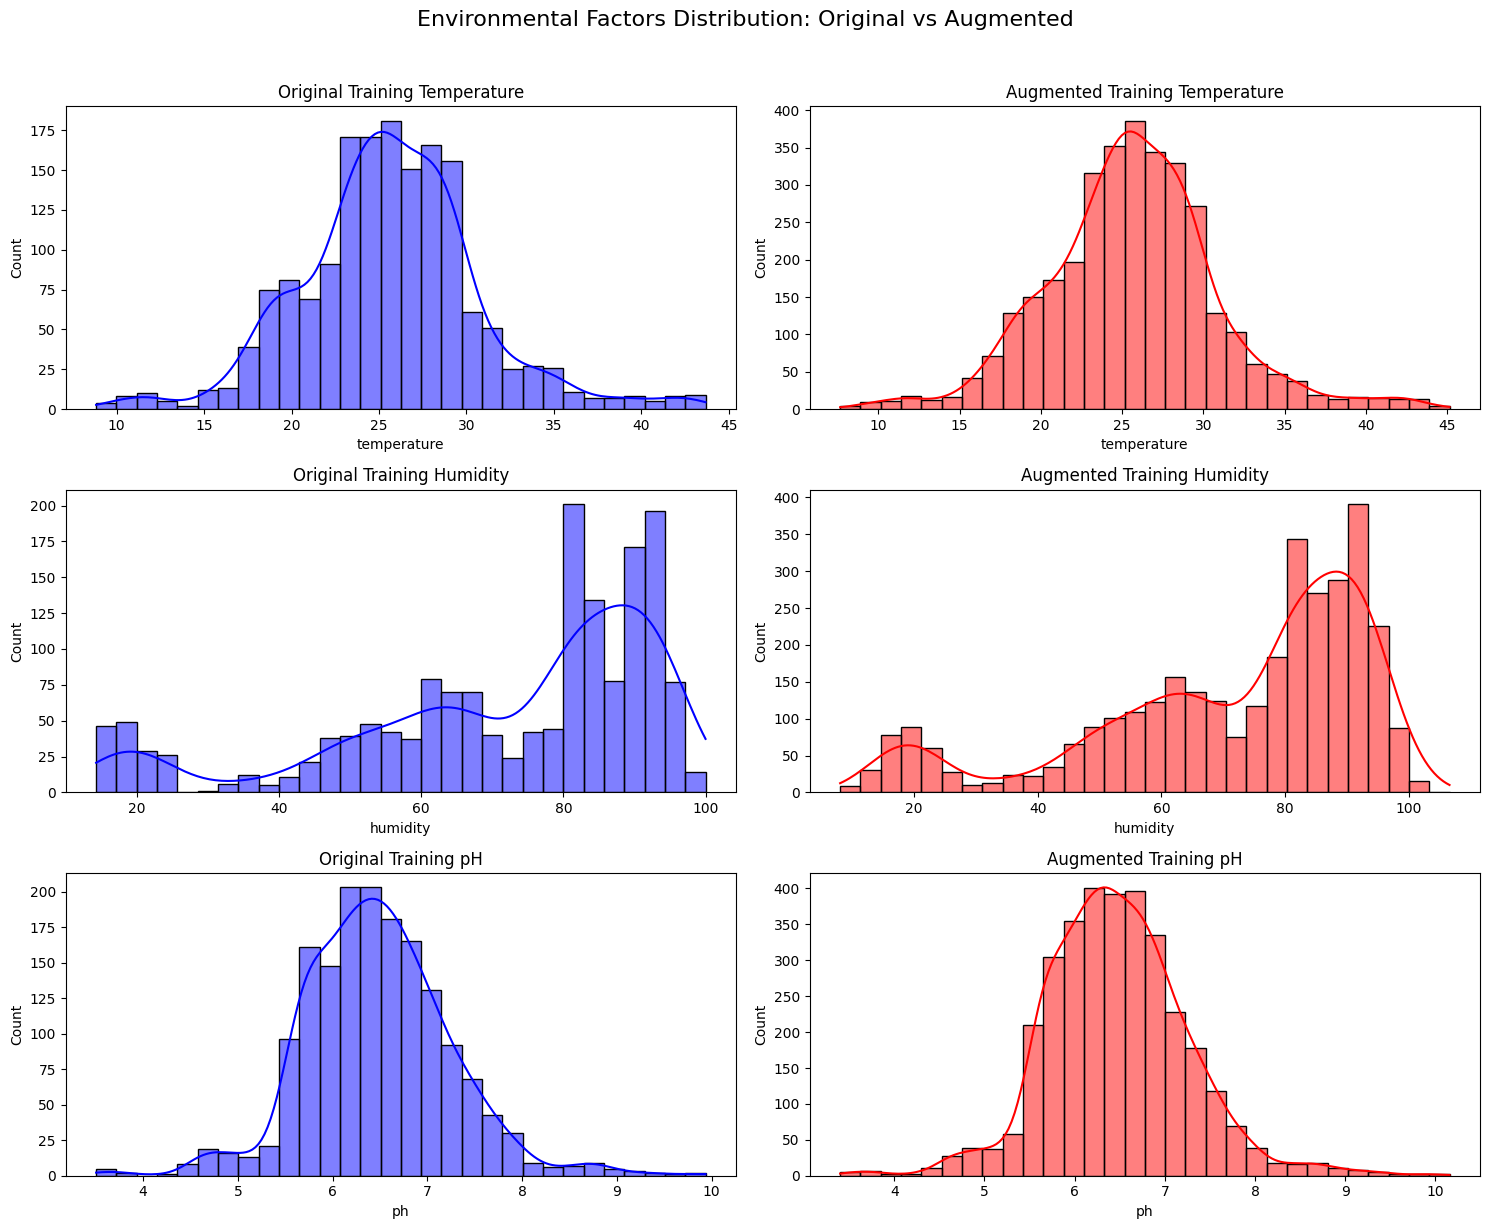


Dataset Shapes:
Original X_train shape: (1650, 7)
Augmented X_train shape: (3300, 7)


In [80]:
# Create separate figures for NPK and environmental factors
# Figure 1: NPK Comparisons
fig1, axes1 = plt.subplots(3, 2, figsize=(15, 12))
fig1.suptitle('Nutrient (NPK) Distribution: Original vs Augmented', fontsize=16, y=1.02)

# N comparison
sns.histplot(X_train['N'], bins=30, kde=True, ax=axes1[0, 0], color='blue').set(title='Original Training Nitrogen (N)')
sns.histplot(X_augmented['N'], bins=30, kde=True, ax=axes1[0, 1], color='red').set(title='Augmented Training Nitrogen (N)')

# P comparison
sns.histplot(X_train['P'], bins=30, kde=True, ax=axes1[1, 0], color='blue').set(title='Original Training Phosphorus (P)')
sns.histplot(X_augmented['P'], bins=30, kde=True, ax=axes1[1, 1], color='red').set(title='Augmented Training Phosphorus (P)')

# K comparison
sns.histplot(X_train['K'], bins=30, kde=True, ax=axes1[2, 0], color='blue').set(title='Original Training Potassium (K)')
sns.histplot(X_augmented['K'], bins=30, kde=True, ax=axes1[2, 1], color='red').set(title='Augmented Training Potassium (K)')

plt.tight_layout()
plt.show()

# Figure 2: Environmental Factors Comparisons
fig2, axes2 = plt.subplots(3, 2, figsize=(15, 12))
fig2.suptitle('Environmental Factors Distribution: Original vs Augmented', fontsize=16, y=1.02)

# Temperature comparison
sns.histplot(X_train['temperature'], bins=30, kde=True, ax=axes2[0, 0], color='blue').set(title='Original Training Temperature')
sns.histplot(X_augmented['temperature'], bins=30, kde=True, ax=axes2[0, 1], color='red').set(title='Augmented Training Temperature')

# Humidity comparison
sns.histplot(X_train['humidity'], bins=30, kde=True, ax=axes2[1, 0], color='blue').set(title='Original Training Humidity')
sns.histplot(X_augmented['humidity'], bins=30, kde=True, ax=axes2[1, 1], color='red').set(title='Augmented Training Humidity')

# pH comparison
sns.histplot(X_train['ph'], bins=30, kde=True, ax=axes2[2, 0], color='blue').set(title='Original Training pH')
sns.histplot(X_augmented['ph'], bins=30, kde=True, ax=axes2[2, 1], color='red').set(title='Augmented Training pH')

plt.tight_layout()
plt.show()

# Print the shapes for reference
print("\nDataset Shapes:")
print("Original X_train shape:", X_train.shape)
print("Augmented X_train shape:", X_augmented.shape)

In [81]:
#Write augmented data to CSV File.
output_file = 'Crop_recommendation_augmented.csv'
augmented_data = pd.concat([X_augmented, y_augmented], axis=1)
augmented_data.to_csv(output_file, index=False)

In [82]:
# Define feature groups for different scaling methods
robust_features = ["N", "P", "K", "rainfall"]  # Robust Scaling (Resistant to outliers)
standard_features = ["temperature", "humidity"]  # StandardScaler (Normally distributed)
power_features = ["ph"]  # Power Transformation (Slight skewness)
# log_features = ["rainfall"]  # Log Transformation (for extreme skewness)

# Define transformers
robust_scaler = RobustScaler()
standard_scaler = StandardScaler()
power_transformer = PowerTransformer(method="yeo-johnson")
# log_transformer = FunctionTransformer(np.log1p)  # log(x + 1) to handle zero values

# Create a ColumnTransformer to apply different scalers to different features
preprocessor = ColumnTransformer([
    ("robust", robust_scaler, robust_features),
    ("standard", standard_scaler, standard_features),
    ("power", power_transformer, power_features),
    # ("log", log_transformer, log_features)
])

# Create a pipeline that includes preprocessing
pipeline = Pipeline([
    ("preprocessing", preprocessor)
])

X_train_scaled = pipeline.fit_transform(X_train)
X_test_scaled = pipeline.transform(X_test)
X_augmented_train_scaled = pipeline.fit_transform(X_augmented)


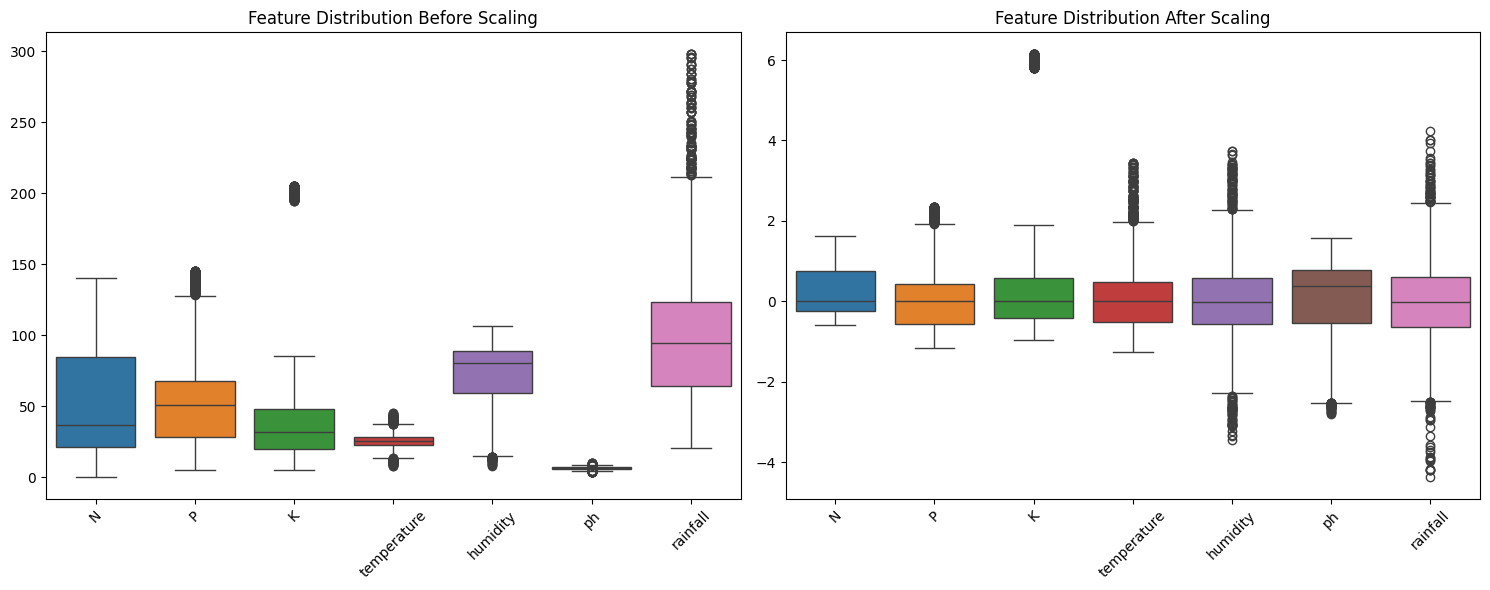


Summary Statistics Before Standardization:
             N        P        K  temperature  humidity       ph  rainfall
count  3300.00  3300.00  3300.00      3300.00   3300.00  3300.00   3300.00
mean     50.46    53.35    48.14        25.61     71.42     6.47    103.37
std      36.97    32.93    50.70         5.21     22.49     0.79     54.84
min      -0.13     4.87     4.99         7.65      8.10     3.40     20.21
25%      21.00    28.00    20.07        22.62     59.31     5.96     64.56
50%      37.00    51.00    32.00        25.56     80.11     6.43     94.87
75%      84.89    68.00    48.17        28.58     89.12     6.93    123.59
max     140.15   145.11   205.19        45.13    106.53    10.16    298.56

Summary Statistics After Standardization:
             N        P        K  temperature  humidity       ph  rainfall
count  3300.00  3300.00  3300.00      3300.00   3300.00  3300.00   3300.00
mean      0.21     0.06     0.57         0.14     -0.00    -0.00      0.00
std       0.5

In [83]:
# Create figure for comparing distributions before and after scaling
plt.figure(figsize=(15, 6))

# Before scaling
plt.subplot(1, 2, 1)
sns.boxplot(data=X_augmented)
plt.title('Feature Distribution Before Scaling')
plt.xticks(rotation=45)

# After scaling
plt.subplot(1, 2, 2)
# Convert scaled array back to dataframe with feature names
scaled_df = pd.DataFrame(
    X_augmented_train_scaled, 
    columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
)
sns.boxplot(data=scaled_df)
plt.title('Feature Distribution After Scaling')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print summary statistics before and after scaling
print("\nSummary Statistics Before Standardization:")
print(X_augmented.describe().round(2))
print("\nSummary Statistics After Standardization:")
print(scaled_df.describe().round(2))

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.metrics import confusion_matrix, classification_report

def plot_model_evaluation(y_true_list, y_pred_list, target_labels, model_name_list, save_dir='plots'):
    """
    Plots side-by-side Confusion Matrices and Classification Report Heatmaps for given models.
    Saves each individual plot as a PNG image.
    
    Args:
        y_true_list: List of ground truths for each model [y_test, y_test]
        y_pred_list: List of predicted values for each model [y_pred_original, y_pred_augmented]
        target_labels: List of class labels (for confusion matrix & report)
        model_name_list: Names of models to title the plots [name_original, name_augmented]
        save_dir: Directory to save the plots
    """
    os.makedirs(save_dir, exist_ok=True)
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))

    for i in range(2):
        model_clean = model_name_list[i].replace(" ", "_").lower()

        # ---- CONFUSION MATRIX ----
        cm = confusion_matrix(y_true_list[i], y_pred_list[i], labels=target_labels)
        sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', 
                    xticklabels=target_labels, yticklabels=target_labels, ax=axes[0, i])
        axes[0, i].set_title(f'{model_name_list[i]} - Confusion Matrix')
        axes[0, i].set_xlabel('Predicted Labels')
        axes[0, i].set_ylabel('True Labels')

        # Save Confusion Matrix
        fig_cm, ax_cm = plt.subplots(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', 
                    xticklabels=target_labels, yticklabels=target_labels, ax=ax_cm)
        ax_cm.set_title(f'{model_name_list[i]} - Confusion Matrix')
        ax_cm.set_xlabel('Predicted Labels')
        ax_cm.set_ylabel('True Labels')
        fig_cm.tight_layout()
        fig_cm.savefig(f"{save_dir}/{model_clean}_confusion_matrix.png")
        plt.close(fig_cm)

        # ---- CLASSIFICATION REPORT ----
        report_dict = classification_report(y_true_list[i], y_pred_list[i], target_names=target_labels, output_dict=True)
        report_df = pd.DataFrame(report_dict).transpose().round(2)

        # Keep specific rows including metrics and averages
        keep_rows = target_labels + ['macro avg', 'weighted avg', 'accuracy']
        report_df = report_df.loc[keep_rows]

        sns.heatmap(report_df[['precision', 'recall', 'f1-score']], annot=True, cmap='Pastel1', fmt=".2f", ax=axes[1, i])
        axes[1, i].set_title(f'{model_name_list[i]} - Classification Report Heatmap')

        # Save Classification Report
        fig_report, ax_report = plt.subplots(figsize=(8, 6))
        sns.heatmap(report_df[['precision', 'recall', 'f1-score']], annot=True, cmap='Pastel1', fmt=".2f", ax=ax_report)
        ax_report.set_title(f'{model_name_list[i]} - Classification Report Heatmap')
        fig_report.tight_layout()
        fig_report.savefig(f"{save_dir}/{model_clean}_classification_report.png")
        plt.close(fig_report)

    plt.suptitle('Model Evaluation Comparison', fontsize=20)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


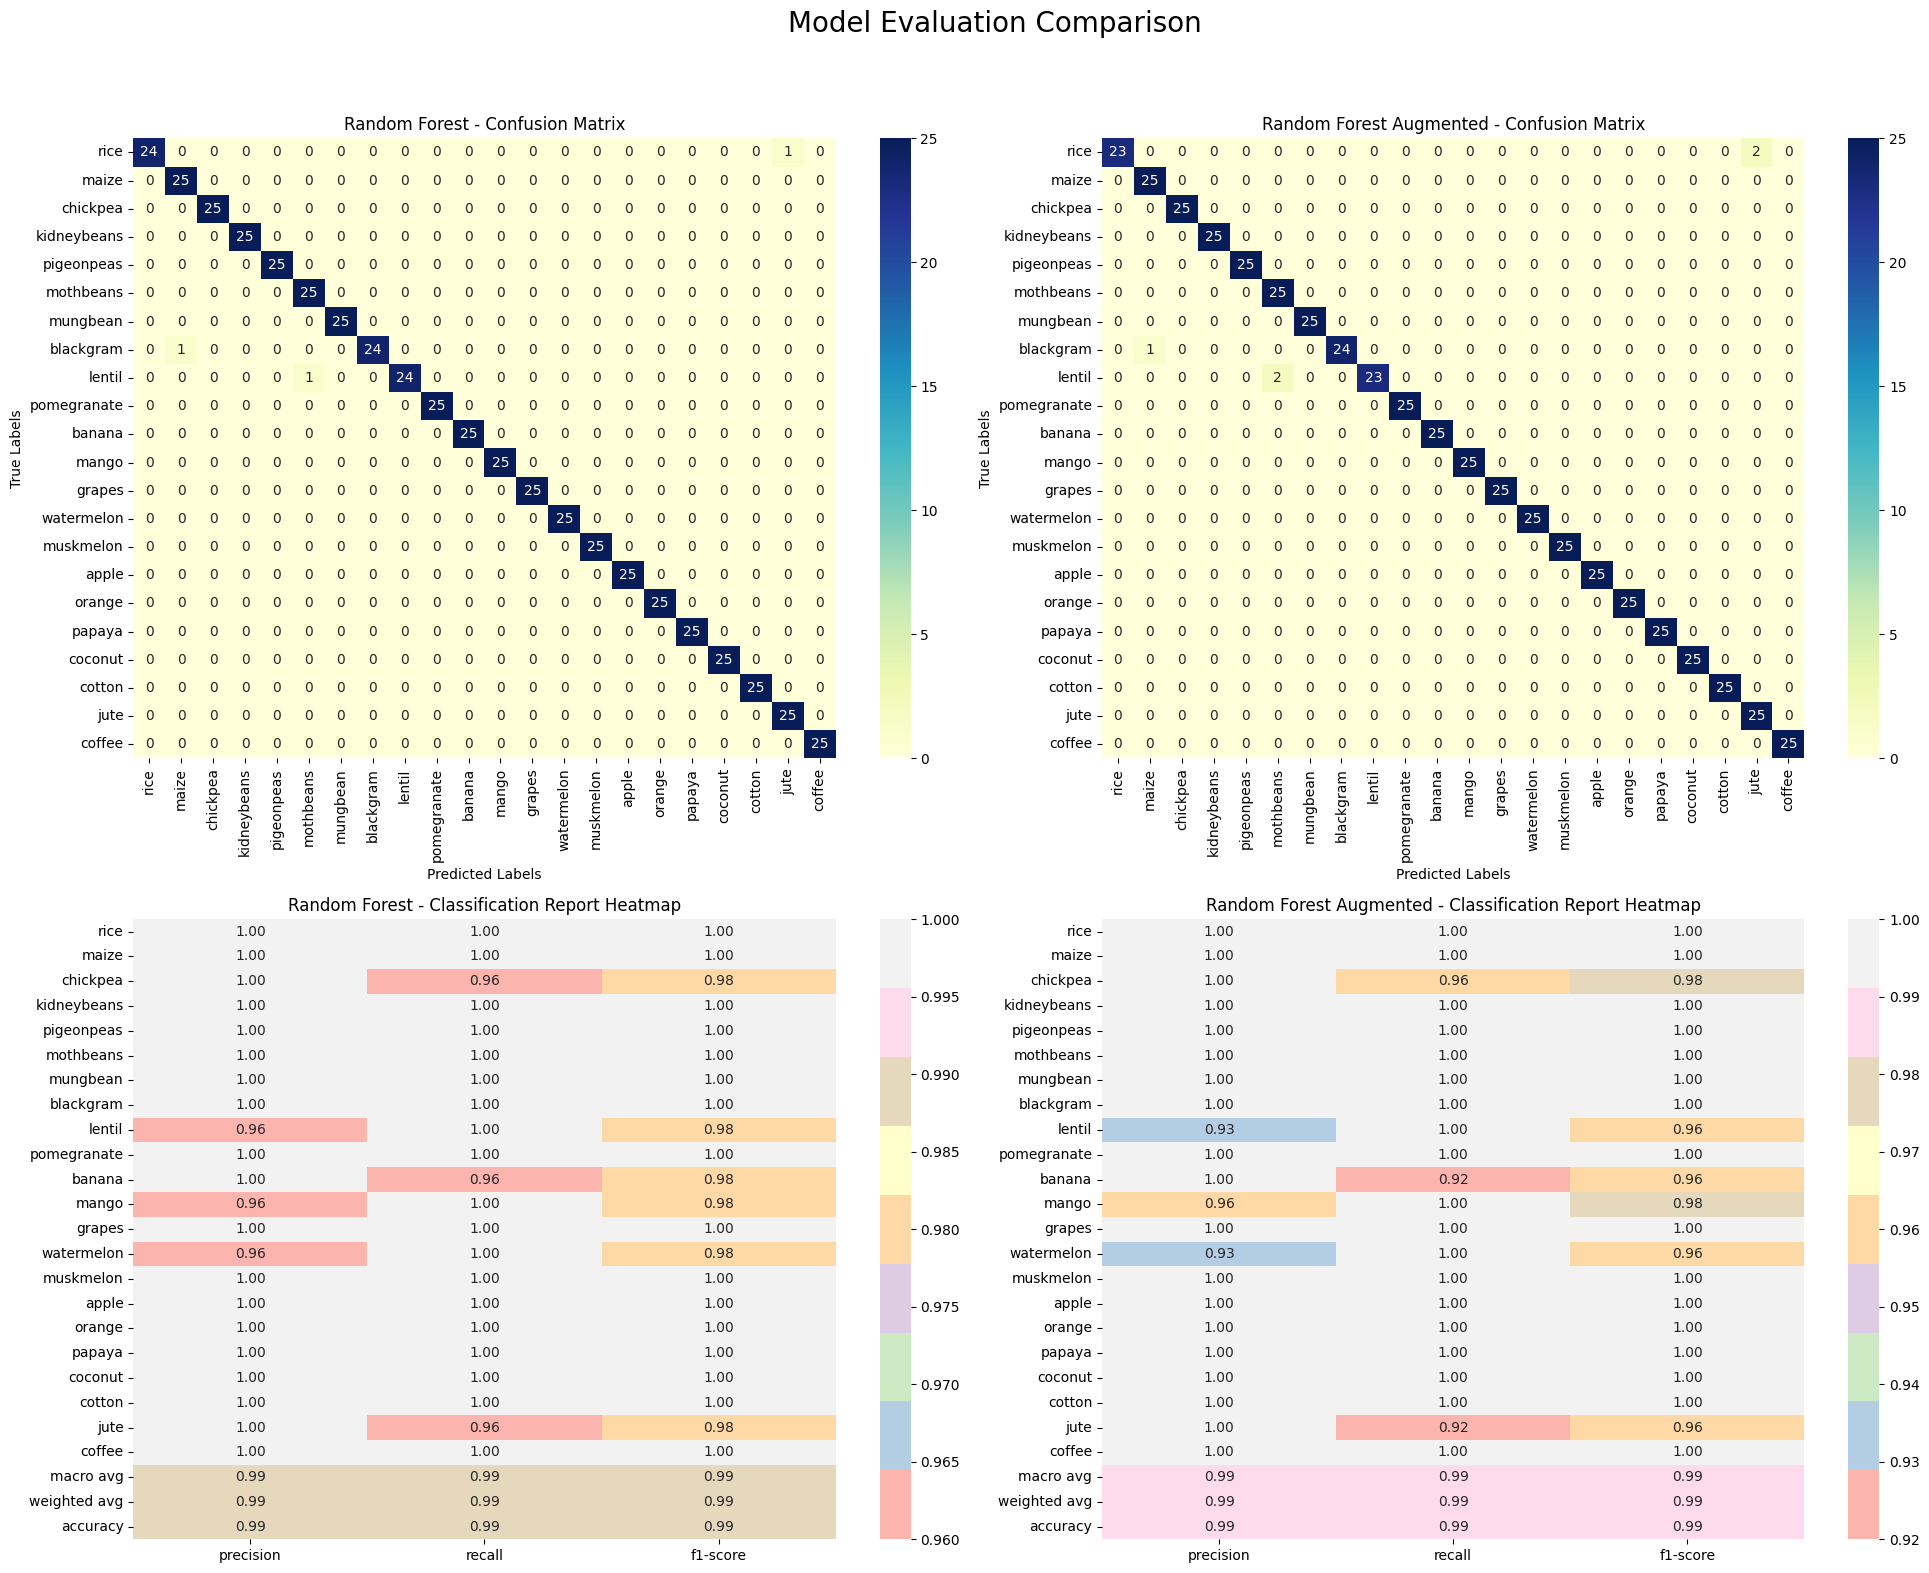

In [101]:
from sklearn.ensemble import RandomForestClassifier

# Fit the model on the original training data
model_RFC = RandomForestClassifier(random_state=42)
model_RFC.fit(X_train_scaled, y_train)
y_pred = model_RFC.predict(X_test_scaled)

# Fit the model on the augmented training data
model_RFC_augmented = RandomForestClassifier(random_state=42)
model_RFC_augmented.fit(X_augmented_train_scaled, y_augmented)
y_pred_augmented = model_RFC_augmented.predict(X_test_scaled)

plot_model_evaluation(
    y_true_list=[y_test, y_test],
    y_pred_list=[y_pred, y_pred_augmented],
    target_labels=list(data['label'].unique()),
    model_name_list=['Random Forest', 'Random Forest Augmented']
)


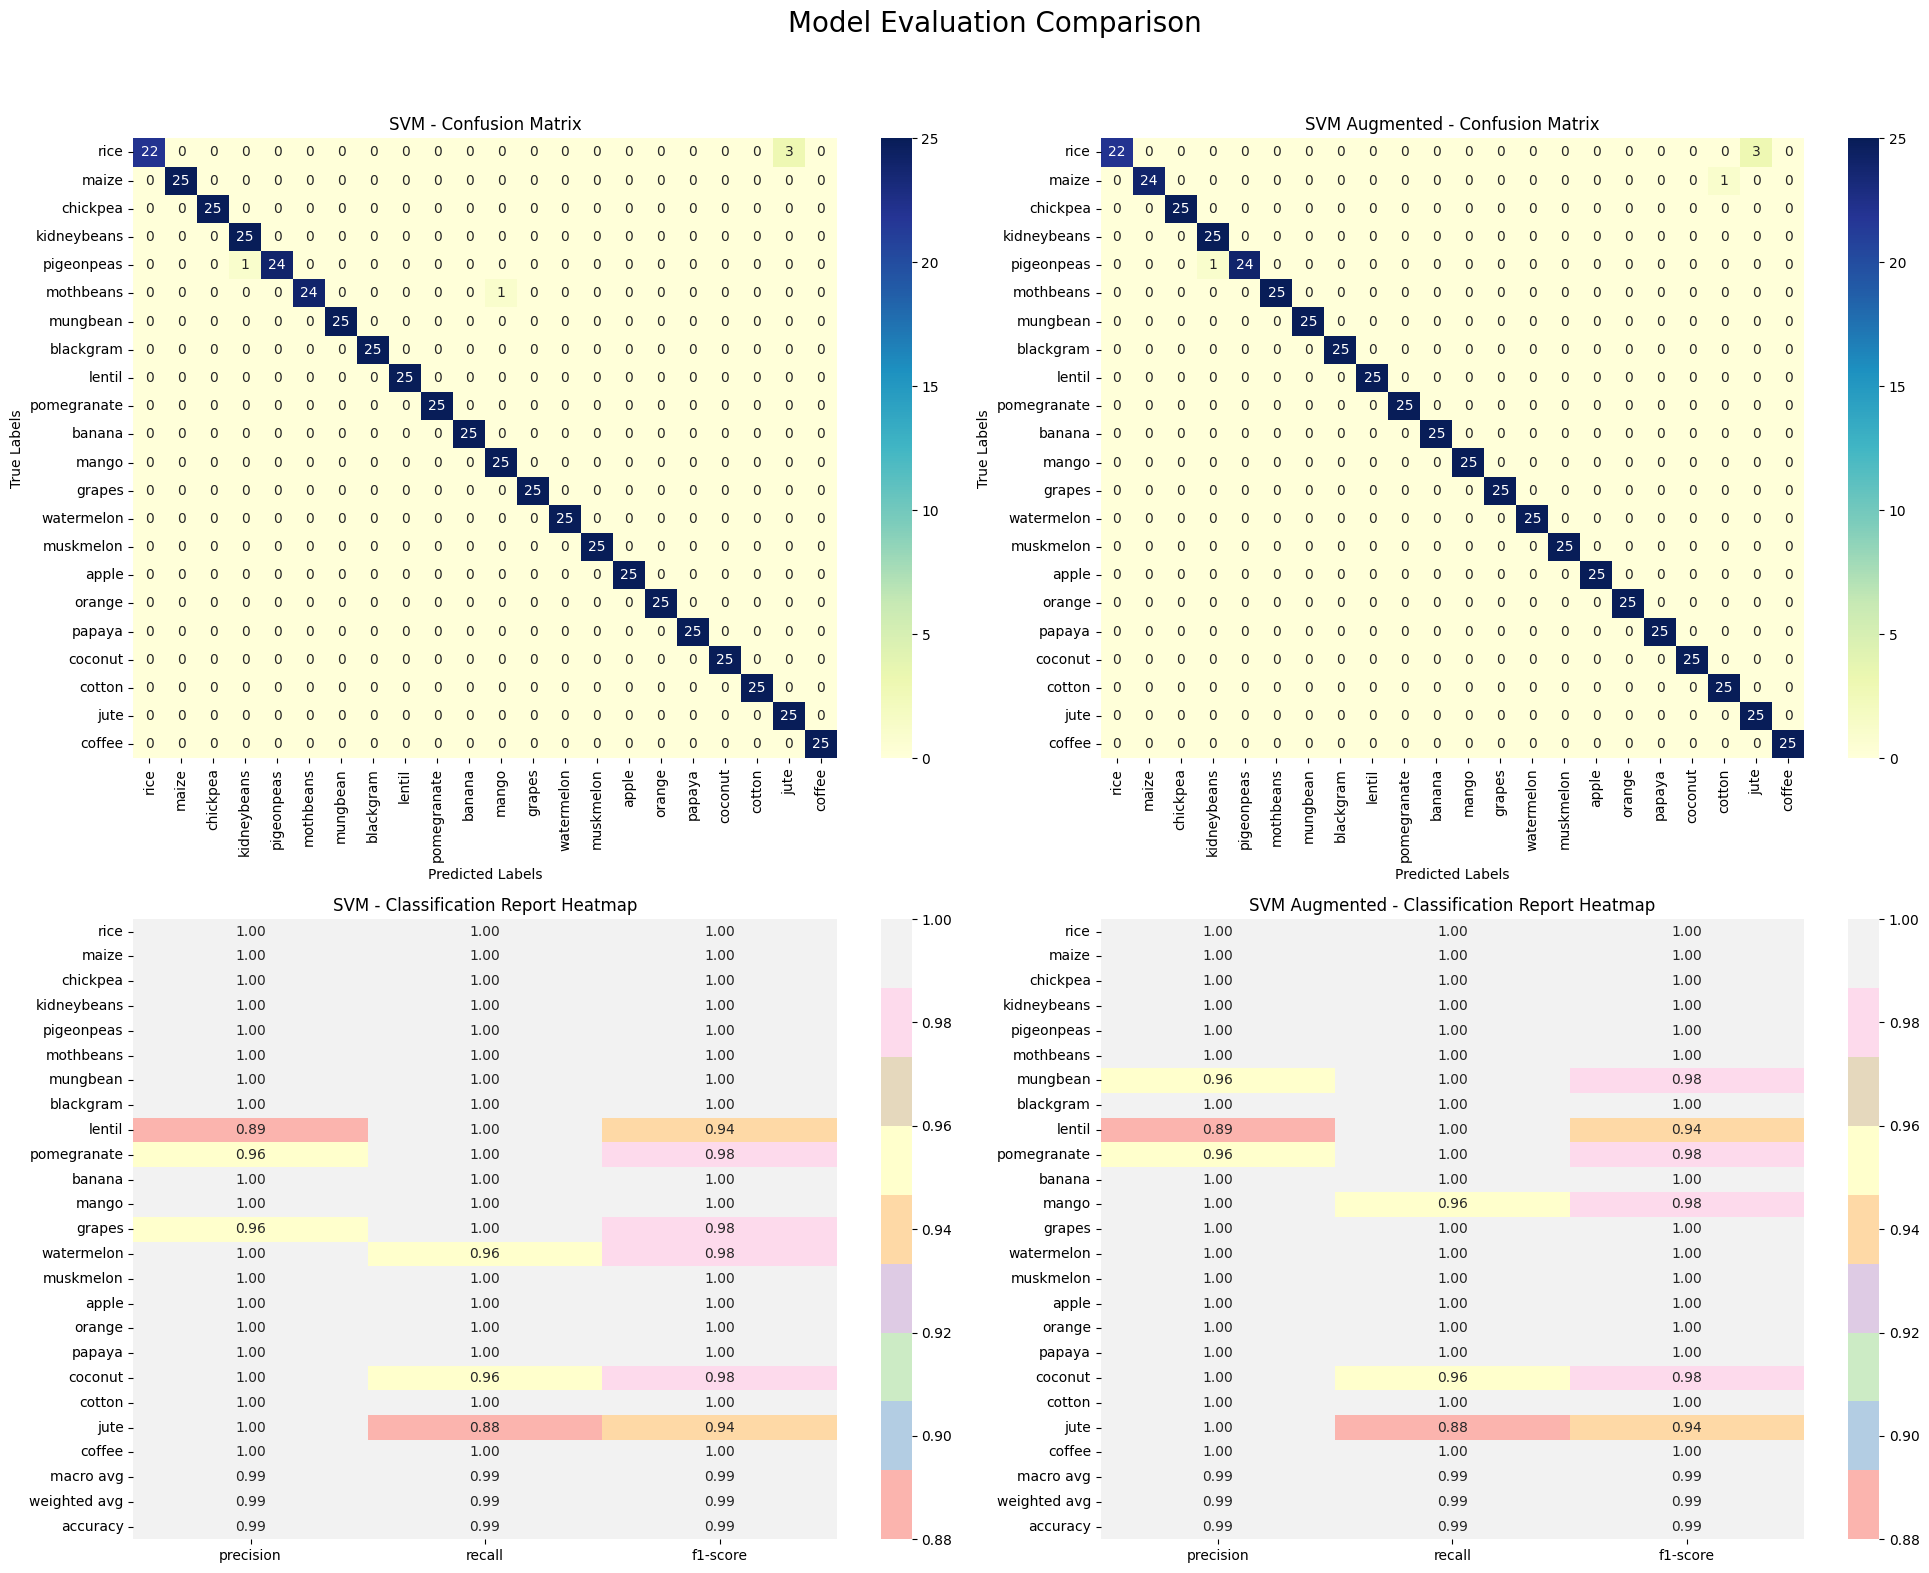

In [102]:
from sklearn.svm import SVC

# Fit the model on the original training data
model_SVM = SVC(kernel = 'rbf', random_state=42)
model_SVM.fit(X_train_scaled, y_train)
y_pred = model_SVM.predict(X_test_scaled)

# Fit the model on the augmented training data
model_SVM_augmented = SVC(kernel = 'rbf', random_state=42)
model_SVM_augmented.fit(X_augmented_train_scaled, y_augmented)
y_pred_augmented = model_SVM_augmented.predict(X_test_scaled)

plot_model_evaluation(
    y_true_list=[y_test, y_test],
    y_pred_list=[y_pred, y_pred_augmented],
    target_labels=list(data['label'].unique()),
    model_name_list=['SVM', 'SVM Augmented']
)


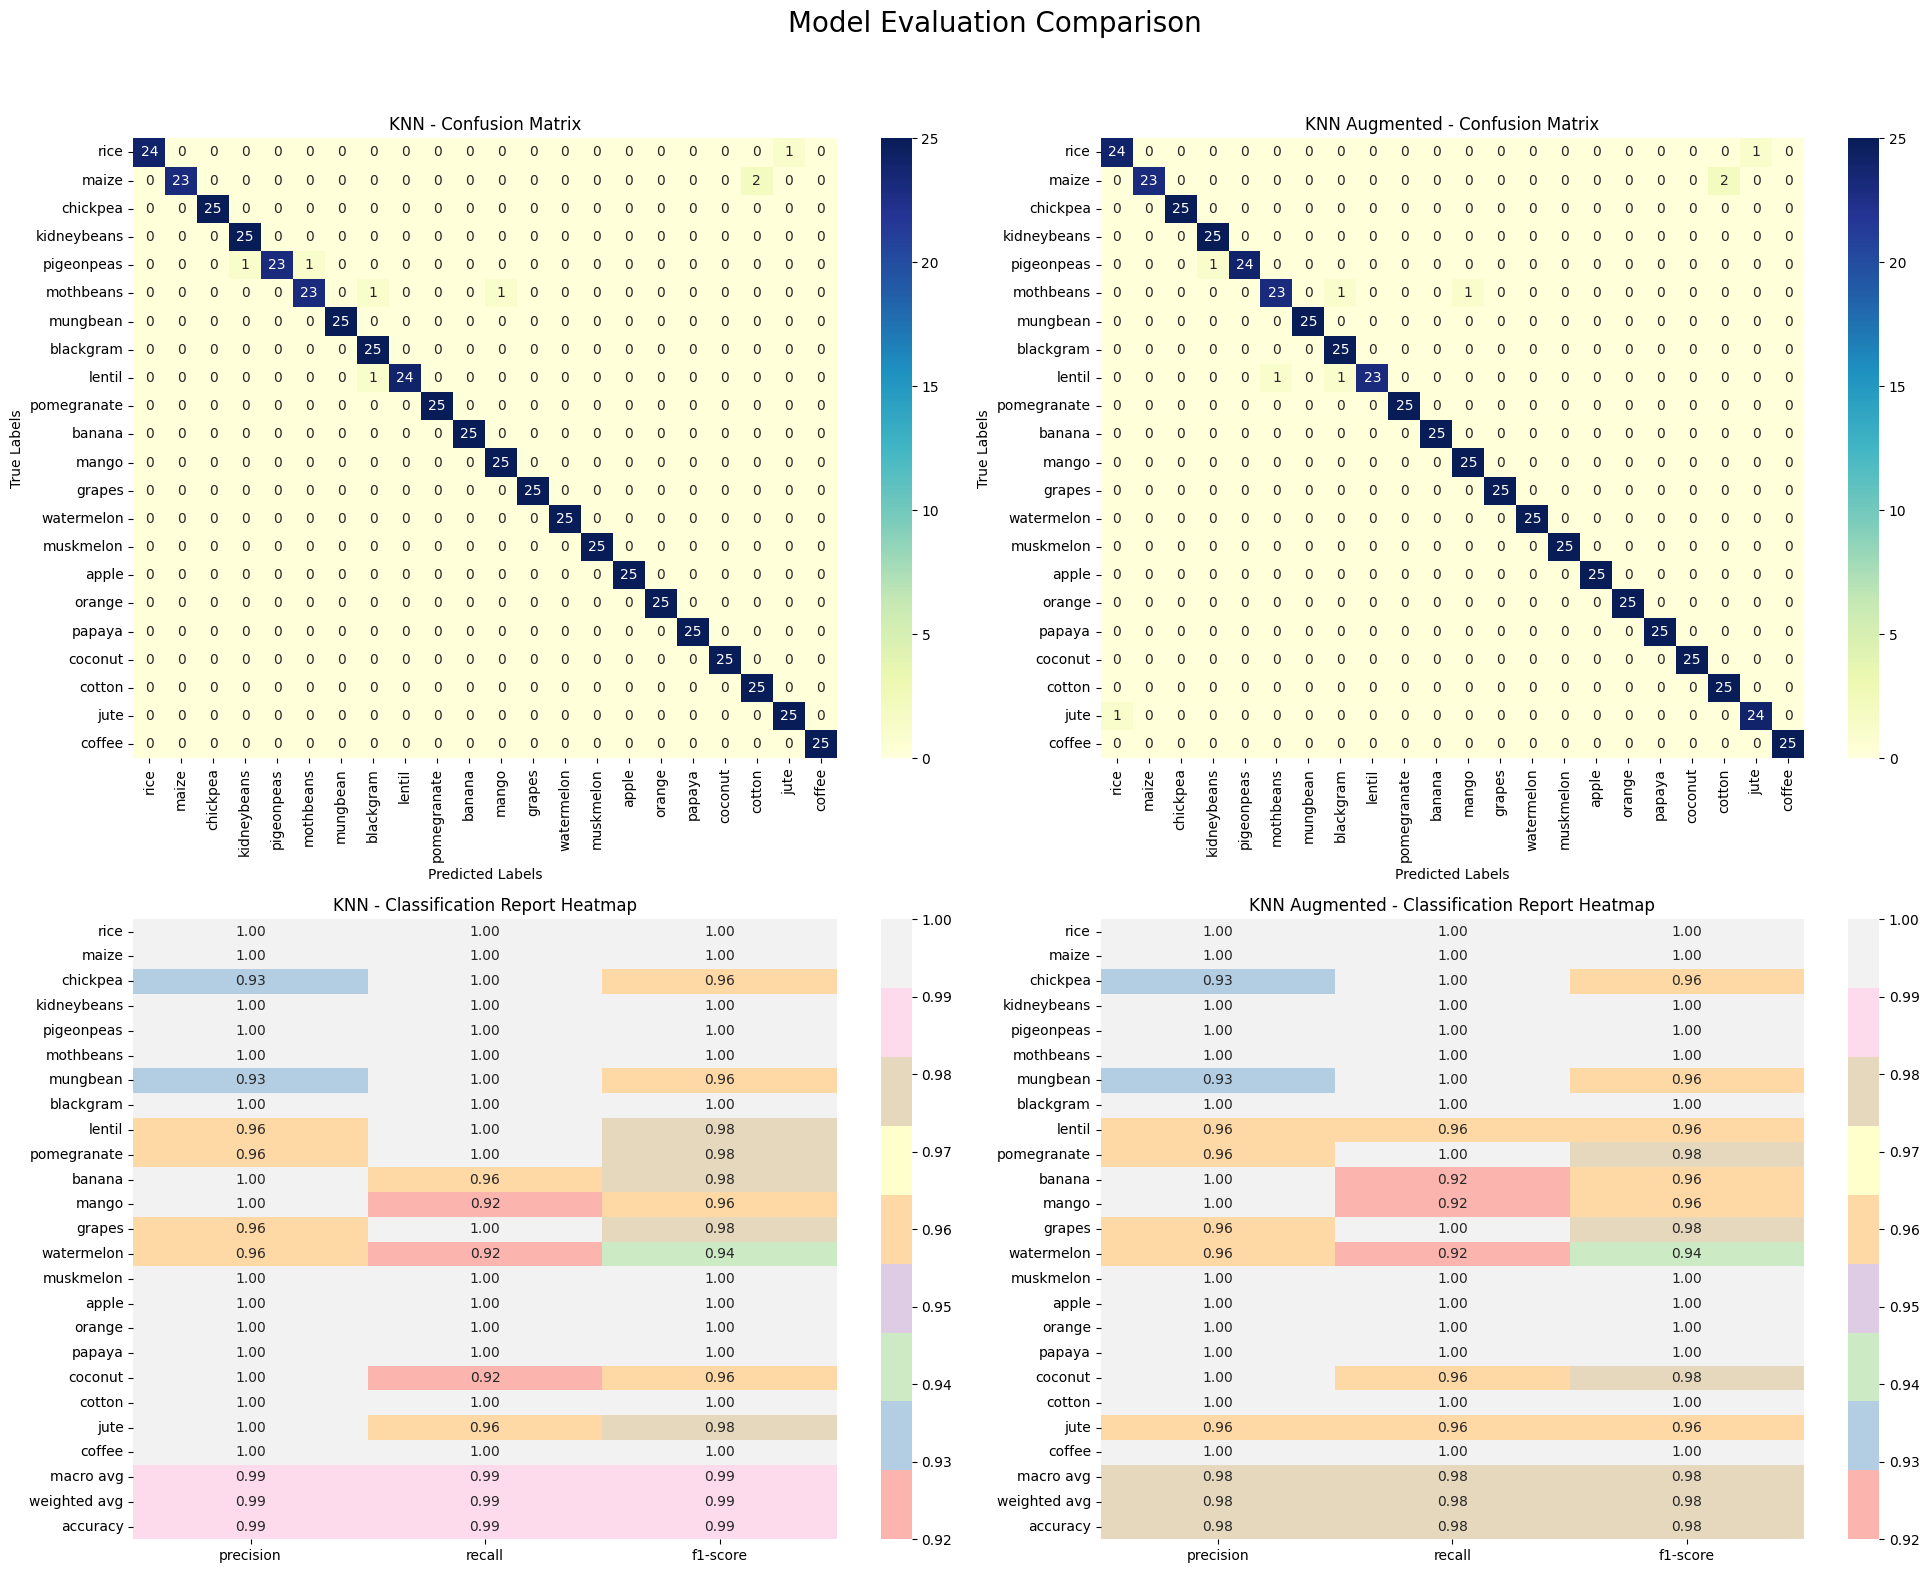

In [103]:
from sklearn.neighbors import KNeighborsClassifier

# Fit the model on the original training data
model_KNN = KNeighborsClassifier(n_neighbors=5)
model_KNN.fit(X_train_scaled, y_train)
y_pred = model_KNN.predict(X_test_scaled)

# Fit the model on the augmented training data
model_KNN_augmented = KNeighborsClassifier(n_neighbors=5)
model_KNN_augmented.fit(X_augmented_train_scaled, y_augmented)
y_pred_augmented = model_KNN_augmented.predict(X_test_scaled)

plot_model_evaluation(
    y_true_list=[y_test, y_test],
    y_pred_list=[y_pred, y_pred_augmented],
    target_labels=list(data['label'].unique()),
    model_name_list=['KNN', 'KNN Augmented']
)
